<a href="https://colab.research.google.com/github/alestarbucks/zdt-moga/blob/main/moga_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Hacer gráficas scatter con los fitness de todos los individuos y los respectivos frentes de paretos óptimos de cada problema benchmark, y guardarlos en el directorio pyplots.

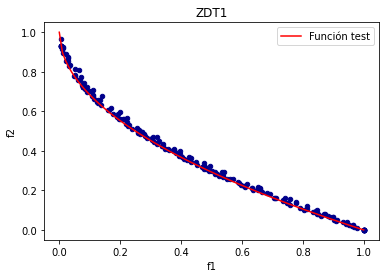

In [12]:
df1 = pd.read_csv('csvs/scores1.csv', header=None)
df1.columns = ['f1','f2']
df1.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
plt.plot(x,y,'r',label='Función test')
plt.legend()
plt.title('ZDT1')
plt.savefig('pyplots/ZDT1',dpi=300)

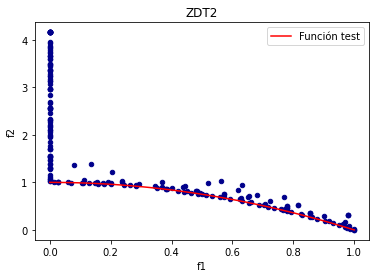

In [13]:
df2 = pd.read_csv('csvs/scores2.csv', header=None)
df2.columns = ['f1','f2']
df2.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,2)
plt.plot(x,y,'r',label='Función test')
plt.legend()
plt.title('ZDT2')
plt.savefig('pyplots/ZDT2',dpi=300)

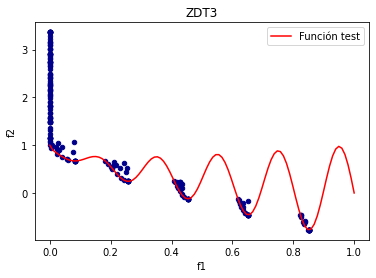

In [14]:
df3 = pd.read_csv('csvs/scores3.csv', header=None)
df3.columns = ['f1','f2']
df3.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)-(x*np.sin(10*math.pi*x))
plt.plot(x,y,'r',label='Función test')
plt.legend()
plt.title('ZDT3')
plt.savefig('pyplots/ZDT3',dpi=300)

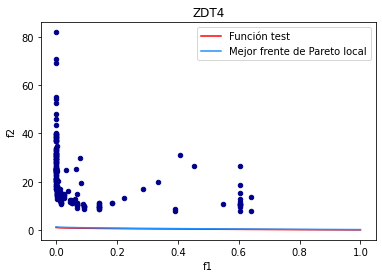

In [15]:
df4 = pd.read_csv('csvs/scores4.csv', header=None)
df4.columns = ['f1','f2']
df4.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
plt.plot(x,y,'r',label='Función test')
y=1.25*(1-np.power(x/1.25,0.5))
plt.plot(x,y,'dodgerblue',label='Mejor frente de Pareto local')
plt.legend()
plt.title('ZDT4')
plt.savefig('pyplots/ZDT4',dpi=300)

<ipython-input-16-2a7f5213547e>:6: RuntimeWarning: divide by zero encountered in true_divide
  y=10/x
<ipython-input-16-2a7f5213547e>:8: RuntimeWarning: divide by zero encountered in true_divide
  y=11/x


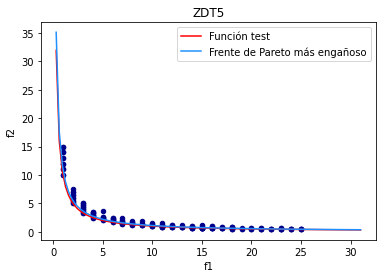

In [16]:
df5 = pd.read_csv('csvs/scores5.csv', header=None)
df5.columns = ['f1','f2']
df5.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,31,100)
y=10/x
plt.plot(x,y,'r',label='Función test')
y=11/x
plt.plot(x,y,'dodgerblue',label='Frente de Pareto más engañoso')
plt.legend()
plt.title('ZDT5')
plt.savefig('pyplots/ZDT5',dpi=300)

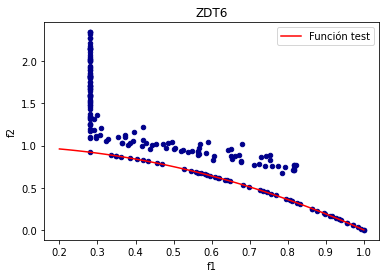

In [17]:
df6 = pd.read_csv('csvs/scores6.csv', header=None)
df6.columns = ['f1','f2']
df6.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0.2,1,100)
y=1-np.power(x,2)
plt.plot(x,y,'r',label='Función test')
plt.legend()
plt.title('ZDT6')
plt.savefig('pyplots/ZDT6',dpi=300)

Definimos funciones para ayudar a calcular el máximo error del frente óptimo de Pareto.

In [18]:
def nearest_dist(f1, f2, x, y, verb=False):
    '''
    explores the space of distances of the solution characterized by fitnesses f1 and f2 as compared to the solutions that comprise
    the optimal Pareto front
    '''

    min_dist = math.inf
    for i in range(len(y)):
        aux = math.sqrt((f1-x[i])**2 + (f2-y[i])**2)
        if aux < min_dist:
            if verb:
                print("---")
                print(f1, f2)
                print(x[i], y[i])
                print("---")
            min_dist = aux
    
    return min_dist

# # test
# nearest_dist(1,6.7193e-09,x=np.linspace(0,1,100),y=1-np.power(x,2))

In [113]:
df_1 = pd.read_csv('csvs/fval1.csv', header=None)
df_2 = pd.read_csv('csvs/fval2.csv', header=None)
df_3 = pd.read_csv('csvs/fval3.csv', header=None)
df_4 = pd.read_csv('csvs/fval4.csv', header=None)
df_5 = pd.read_csv('csvs/fval5.csv', header=None)
df_6 = pd.read_csv('csvs/fval6.csv', header=None)

dfs_front = [df_1, df_2, df_3, df_4, df_5, df_6]


In [114]:
max_errors = []

worst_error = 0
x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
for column_name, data in df_1.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0,1,100)
y=1-np.power(x,2)
for column_name, data in df_2.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0,1,100)
y=1-np.power(x,0.5)-(x*np.sin(10*math.pi*x))
for column_name, data in df_3.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
for column_name, data in df_4.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(1,31,100)
y=10/x
for column_name, data in df_5.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0.2,1,100)
y=1-np.power(x,2)
for column_name, data in df_6.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

max_errors


[0.030612250117843253,
 3.157200000558723,
 2.3632,
 35.73800001011519,
 0.2548603641477927,
 1.1930379283157766]

Código necesario para calcular el hipervolumen. Primero, es necesario normalizar los fitnesses de todos los individuos para poder comparar los hipervolumenes de los diferentes tests.

In [118]:
def hypervolume(df, wx, wy, x, y):
    hvq = 0

    # sort by f1 in descending order in order to not repeat areas in count
    sorted_df = df.sort_values(0, axis=0, ascending=False)
    first = True

    for column_name, data in sorted_df.iterrows():
        if first:
            prev_f1 = wx
            first = False
        f1 = data[0]
        f2 = data[1]

        hvq += (prev_f1-f1)*(wy-f2)
        prev_f1 = f1

    hvp = 0
    first = True
    for i in range(1,len(y)+1):
        if first:
            prev_f1 = wx
            first = False
        f1 = x[len(y)-i]
        f2 = y[len(y)-i]
        hvp += (prev_f1-f1)*(wy-f2)
        prev_f1 = f1
    
    hvr = hvq/hvp

    return hvr

In [119]:
hypervolumes = []

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
hypervolumes.append(hypervolume(df_1, df_1[0].max()*1.2, df_1[1].max()*1.2,x,y))

# ------

x=np.linspace(0,1,100)
y=1-np.power(x,2)
hypervolumes.append(hypervolume(df_2, df_2[0].max()*1.2, df_2[1].max()*1.2,x,y))

# ------

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)-(x*np.sin(10*math.pi*x))
hypervolumes.append(hypervolume(df_3, df_3[0].max()*1.2, df_3[1].max()*1.2,x,y))

# ------

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
hypervolumes.append(hypervolume(df_4, df_4[0].max()*1.2, df_4[1].max()*1.2,x,y))

# ------

x=np.linspace(1,31,100)
y=10/x

hypervolumes.append(hypervolume(df_5, df_5[0].max()*1.2, df_5[1].max()*1.2,x,y))

# ------

x=np.linspace(0.2,1,100)
y=1-np.power(x,2)
hypervolumes.append(hypervolume(df_6, df_6[0].max()*1.2, df_6[1].max()*1.2,x,y))

# ------

hypervolumes

[0.9916082637976781,
 0.9980733471127846,
 1.1124961765893213,
 0.8160791215814769,
 0.9865565377073634,
 0.9238128490326185]